# Practical Statistics for Data Scientists (Python)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

## What have I learned from this chapter?

1. The proliferation of data of varying quality and relevance reinforces the need for sampling as a tool to work efficiently with a variety of data and to minimize bias.
2. Stratified sampling - dividing the population into strata (A homogeneous subgroup of a population with common characteristics.) and randomly sampling from each strata.
3. Big data is needed when data is also sparse - entries of interest are rare.
4. Sampling distribution of a statistic - distribution of sample statistic like mean over many samples.
5. The central limit theorem receives a lot of attention in traditional statistics texts because it underlies the machinery of hypothesis tests and confidence intervals, which themselves consume half the space in such texts. Data scientists should be aware of this role; however, since formal hypothesis tests and confidence intervals play a small role in data science, and the bootstrap  is available in any case, the central limit theorem is not so central in the practice of data science.
6. The standard error is a single metric that sums up the variability in the sampling distribution for a statistic.
7. In modern statistics, the bootstrap has become the standard way to estimate standard error.

8. The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.

9. What are confidence intervals? It is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).
10. What are confidence levels? It is the percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.
11. Confidence intervals vs credibility intervals is a complex topic, as well as determining bias from the bootstrap sample.
12. Standardized data points are called z-scores.
13. t-distribution is the analogue of normal distribution, when population variance is unknown (nor is population mean) and sample variance is used instead. t-distribution has thicker tails.
14. Chi-squared distribution - family of distributions,deviation from the expected count (no correlations) of categorical variables, has a related statistic.
15. F-distribution - distribution used in multiple hypothesis testing with ANOVA. Similarly to Chi-squared measures departures from null hypothesis. The F-statistic measures is the ratio of the variability among the group means to the variability within each group (also called residual variability).
16. Poisson distribution - random events spread over time with constant rate. Lambda is the rate.
17. Exponential distribution - related to Poisson distribution, distribution of time periods between events.
18. Weibull distribution - generalised Poisson, distribution when rate between events chnages faster than events take place.

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Figure 2.1

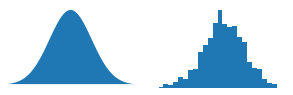

In [4]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Sampling Distribution of a Statistic

In [4]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
8404    45000.0  Data
42504   22000.0  Data
683     42000.0  Data
1605   107000.0  Data
26194   57073.0  Data


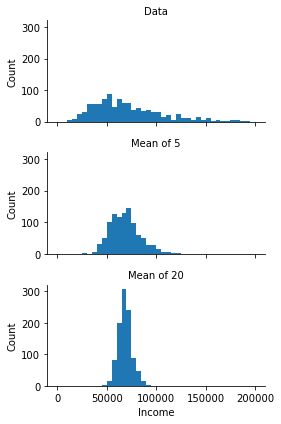

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# The Bootstrap

In [69]:
results = []
for nrepeat in range(10000):
    sample = resample(loans_income,n_samples=1000, replace=True)
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.mean()}')
print(f'bias: {results.mean() - loans_income.mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 68760.51844
bias: -15.87918429999263
std. error: 1036.5034787934076


# Confidence Intervals

68760.51844
68830.2731


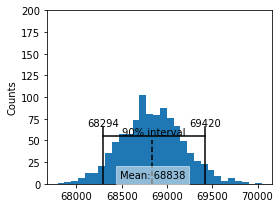

In [45]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=10000, replace=True)
print(sample20.mean())
results = []
for nrepeat in range(1000):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 200)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

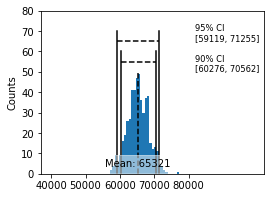

In [70]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=100, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution
## Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

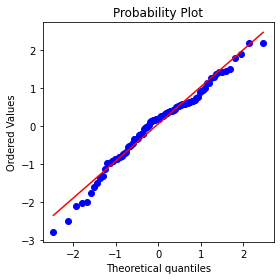

In [71]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions

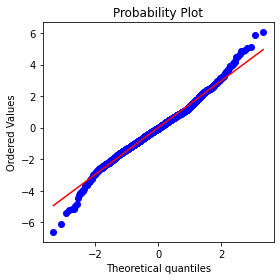

In [73]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# Binomial Distribution

In [76]:
print(stats.binom.pmf(2, n=5, p=0.3))

0.3086999999999998


In [75]:
print(stats.binom.cdf(1, n=5, p=0.3))

0.52822


# Poisson and Related Distribution
## Poisson Distributions

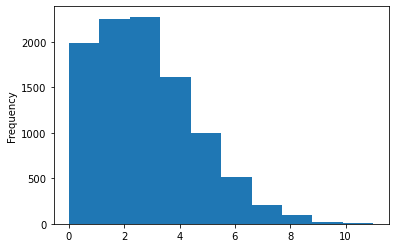

In [83]:
sample = stats.poisson.rvs(3, size=10000)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

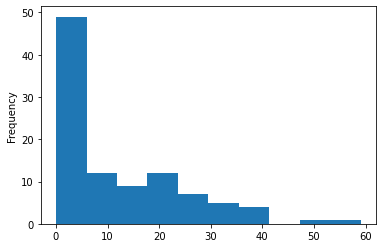

In [85]:
sample = stats.expon.rvs(scale=10, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

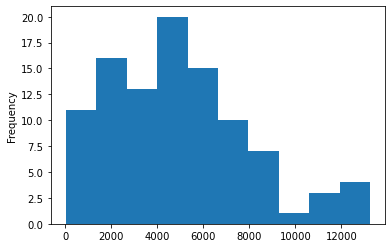

In [86]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()